<a href="https://colab.research.google.com/github/Avichay3/Full-training/blob/main/Copy_of_Data_science_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Mission Overview

A **Data science mission** involves building a system that learns from data to make predictions or discover patterns. The process begins by defining the problem, gathering and preparing the necessary data, choosing and training models, and finally deploying the model for real-world use. Each step ensures the model is optimized for accuracy, efficiency, and adaptability.

### Key Steps in an Data science Mission:
- **Define the problem**: Identify the goal (classification, regression, clustering, etc.).
- **Collect data**: Gather relevant data for the task.
- **Data preprocessing**: Clean, normalize, and prepare the data.
- **Exploratory Data Analysis (EDA)**: Explore patterns and relationships in the data.
- **Feature engineering**: Create or modify features to improve model performance.
- **Model selection**: Choose appropriate algorithms for the problem.
- **Model training**: Train the model using the training data.
- **Validation**: Validate model performance and tune hyperparameters.
- **Evaluation**: Test the model using appropriate metrics.
- **Deployment**: Deploy the model for real-world usage.

In this assignment we will get a good grip on the entire process of a Data science task. Here, you will experience the world of ML and DL.

Mission goal:
  * provide a full ML solution and analysis of *Bank Marketing Dataset*. https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset
  * provide a full DL solution and analysis of *MNIST Dataset*.
  https://www.kaggle.com/datasets/hojjatk/mnist-dataset

For each mission, be sure to fill the following cells. If you think anything is missing, please contact your instructor.

0. **Problem understanding**  
   - Understand what is the task that you are requested to solve. what is the buisness problem?
   - Be sure to understand your data. what are the features? what is the target?

Write the answer

1. binary classification
2. The features is the age, the gender,

1. **Data Loading**  
   - Load the provided dataset using appropriate libraries (e.g., `pandas`, `numpy`).

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os

In [3]:

for root, dirs, files in os.walk("/content/drive/MyDrive"):
    if "bank.csv" in files:
        print(os.path.join(root, "bank.csv"))


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:

path = "/content/drive/MyDrive/bank.csv"
df = pd.read_csv(path, sep=",")
df.head(5)
df.tail(5)




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


2. **Exploratory Data Analysis (EDA)**  
   Perform an initial exploration of the data:
   - **Anomalies:** Identify any outliers or anomalies.
   - **Missing Values:** Check for missing values.
   - **Data Types:** Verify the types of your data (numerical, categorical, etc.).
   - **Class Imbalance (if applicable):** Check for imbalanced classes and address it if necessary (e.g., resampling techniques, class weighting).

   Awnser these questions and more to understand better the data:
   - What is the most common age group that survived?
   - Which pclass was more likely to survive?
   - How many children under the age of 18 died?
   - Ask your self some more questions, and show the answers using charts.

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum().sort_values(ascending=False).head(10)
(df == "unknown").sum().sort_values(ascending=False).head(10)


,0
poutcome,8326
contact,2346
education,497
job,70
age,0
default,0
balance,0
housing,0
marital,0
loan,0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=["int64","float64"]).columns
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


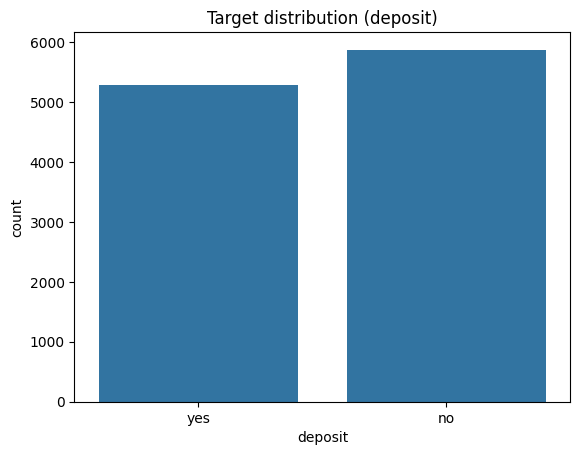

In [9]:
df["deposit"].value_counts()
df["deposit"].value_counts(normalize=True)
plt.figure()
sns.countplot(x="deposit", data=df)
plt.title("Target distribution (deposit)")
plt.show()


In [10]:
# The target -> change it to numerical
print(df["deposit"].unique())

y = (df["deposit"] == "yes").astype(int)


['yes' 'no']


In [11]:
X = df.drop(columns=["deposit"])
y = (df["deposit"] == "yes").astype(int)
X.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown



3. **Data Cleaning**  
   - Handle missing values using appropriate techniques (imputation, deletion, etc.). Explain.
   - Deal with anomalies if necessary (e.g., transformation, capping, or removing outliers). Explain.

In [12]:
# I was already did that
(df == "unknown").sum().sort_values(ascending=False)


,0
poutcome,8326
contact,2346
education,497
job,70
age,0
default,0
balance,0
housing,0
marital,0
loan,0


In [13]:
print(df.isnull().sum().sum())
df.shape


0


(11162, 17)

There is no missing values but there is "Unknown" values which is data that was not collected

4. **Feature Engineering**  
   - Create new features or transform existing ones. Explain.
   - Handle categorical variables (e.g., one-hot encoding, label encoding). Explain.
   - Scale/normalize numerical data if necessary. Explain.
   - Remove redundant, irrelevant, or highly correlated features. Explain.
   - Use feature selection methods if applicable (e.g., recursive feature elimination, importance-based selection). Explain.

In [14]:
df["age_group"] = pd.cut(
    df["age"],
    bins=[17,25,35,45,55,65,120],
    labels=["18-25","26-35","36-45","46-55","56-65","66+"]
)

df['age_group']


,age_group
0,56-65
1,56-65
2,36-45
3,46-55
4,46-55
...,...
11157,26-35
11158,36-45
11159,26-35
11160,36-45


In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)


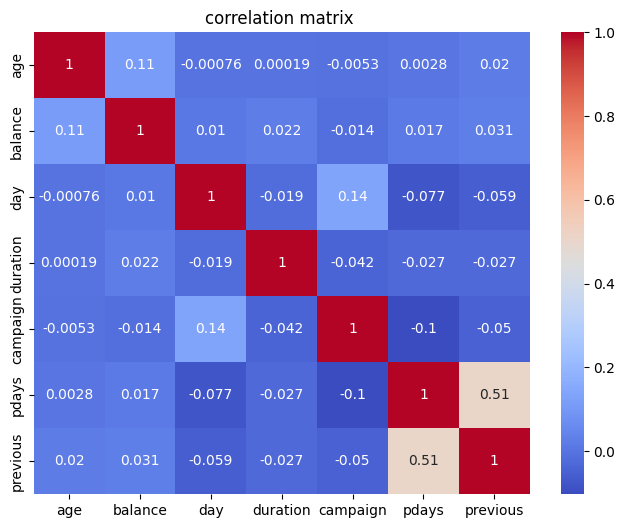

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=["int64","float64"]).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("correlation matrix ")
plt.show()


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

X = df.drop(columns=["deposit", "duration"], errors="ignore")
y = (df["deposit"] == "yes").astype(int)

num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])


In [18]:
df.columns.tolist()


['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit',
 'age_group']

In [19]:
X_trans = preprocess.fit_transform(X)
X_trans.shape


(11162, 50)

5. **Data Splitting**  
   - Split the dataset into training, validation, and test sets: Explain how to split.
     - **Training set:** For model training.
     - **Validation set:** For hyperparameter tuning and validation.
     - **Test set:** For final model evaluation.
   - Consider using **cross-validation** for better validation if the dataset is small.

In [20]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42,
    stratify=y
)


In [21]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.176,
    random_state=42,
    stratify=y_train_val
)


In [22]:
print("train:", X_train.shape)
print("validation:", X_val.shape)
print("test:", X_test.shape)


train: (7817, 16)
validation: (1670, 16)
test: (1675, 16)


6. **Model Selection**  
   Train at least **3 different models** of your choice (e.g., Decision Trees, Random Forest, Logistic Regression, SVM, etc.):
   - Justify your model choices.
   - Evaluate your models using **3 metrics** (e.g., accuracy, precision, recall, F1 score, RMSE, etc.).
   - Explain model predictions using **interpretability** techniques (e.g., feature importance plots, SHAP).

In [23]:
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns
num_cols = X_train.select_dtypes(include=[np.number]).columns

print("Categorical columns:", list(cat_cols))
print("Numeric columns:", list(num_cols))


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_group']
Numeric columns: ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_group']
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def eval_model(model, X, y):
    pred = model.predict(X)
    return {
        "accuracy": accuracy_score(y, pred),
        "precision": precision_score(y, pred, zero_division=0),
        "recall": recall_score(y, pred, zero_division=0),
        "f1": f1_score(y, pred, zero_division=0),
    }

models = {
    "Logistic Regression": Pipeline(steps=[
        ("preprocess", preprocess),
        ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42))
    ]),
    "Random Forest": Pipeline(steps=[
        ("preprocess", preprocess),
        ("clf", RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1, class_weight="balanced"))
    ]),
    "SVM (RBF)": Pipeline(steps=[
        ("preprocess", preprocess),
        ("clf", SVC(kernel="rbf", C=1.0, gamma="scale", class_weight="balanced"))
    ])
}

rows = []
for name, model in models.items():
    model.fit(X_train, y_train)
    scores = eval_model(model, X_val, y_val)
    rows.append({"model": name, **scores})

results_df = pd.DataFrame(rows).sort_values("f1", ascending=False)
results_df


,model,accuracy,precision,recall,f1
1,Random Forest,0.719760,0.733719,0.640961,0.684211
2,SVM (RBF),0.730539,0.778140,0.603034,0.679487
0,Logistic Regression,0.710180,0.736518,0.604298,0.663889


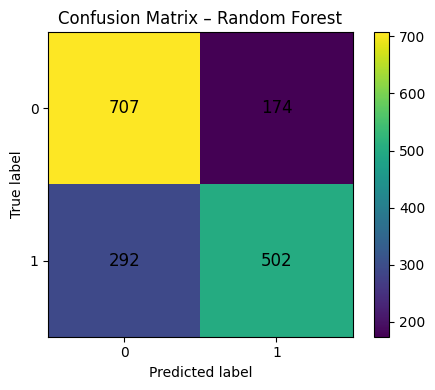

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

best_name = results_df.iloc[0]["model"]
best_model = models[best_name]

best_model.fit(X_train, y_train)
test_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, test_pred)

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm)

ax.set_title(f"Confusion Matrix – {best_name}")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["0", "1"])
ax.set_yticklabels(["0", "1"])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center", fontsize=12)

plt.colorbar(im)
plt.tight_layout()
plt.show()


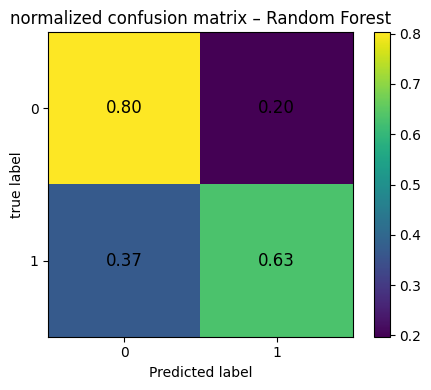

In [27]:
cm_norm = cm / cm.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm_norm)

ax.set_title(f"normalized confusion matrix – {best_name}")
ax.set_xlabel("Predicted label")
ax.set_ylabel("true label")

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["0", "1"])
ax.set_yticklabels(["0", "1"])

for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, f"{cm_norm[i, j]:.2f}",
                ha="center", va="center", fontsize=12)

plt.colorbar(im)
plt.tight_layout()
plt.show()


lets see if there is imbalance in the data.

In [28]:
y.value_counts()


,count
deposit,
0,5873
1,5289


7. **Model Optimization**  
   - Perform hyperparameter tuning using techniques like **GridSearchCV** or **RandomizedSearchCV**.
   - Apply feature selection if necessary.

In [29]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.experimental import enable_halving_search_cv  # noqa: F401
from sklearn.model_selection import HalvingRandomSearchCV

from scipy.stats import randint

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        class_weight="balanced"
    ))
])

param_dist = {
    "clf__max_depth": [None, 8, 12, 16, 20, 30],
    "clf__min_samples_split": randint(2, 25),
    "clf__min_samples_leaf": randint(1, 12),
    "clf__max_features": ["sqrt", "log2", None],
    "clf__bootstrap": [True, False],
}

search = HalvingRandomSearchCV(
    estimator=rf_pipe,
    param_distributions=param_dist,
    scoring="f1",
    cv=5,
    factor=3,
    resource="clf__n_estimators",
    min_resources=80,
    max_resources=600,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
print("Best CV F1:", search.best_score_)
print("Best params:", search.best_params_)


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 80
max_resources_: 600
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 7
n_resources: 80
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 1
n_candidates: 3
n_resources: 240
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best CV F1: 0.6936133877457964
Best params: {'clf__bootstrap': False, 'clf__max_depth': 16, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 13, 'clf__n_estimators': 240}


now lets see if the model was improved

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def eval_scores(model, X, y):
    pred = model.predict(X)
    return {
        "accuracy": accuracy_score(y, pred),
        "precision": precision_score(y, pred, zero_division=0),
        "recall": recall_score(y, pred, zero_division=0),
        "f1": f1_score(y, pred, zero_division=0),
    }

best_model = search.best_estimator_

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf_baseline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced"
    ))
])

rf_baseline.fit(X_train, y_train)
best_model.fit(X_train, y_train)

baseline_val = eval_scores(rf_baseline, X_val, y_val)
baseline_test = eval_scores(rf_baseline, X_test, y_test)

tuned_val = eval_scores(best_model, X_val, y_val)
tuned_test = eval_scores(best_model, X_test, y_test)

comp_val = pd.DataFrame([
    {"model": "RF baseline", **baseline_val},
    {"model": "RF tuned (halving)", **tuned_val},
]).sort_values("f1", ascending=False)

comp_test = pd.DataFrame([
    {"model": "RF baseline", **baseline_test},
    {"model": "RF tuned (halving)", **tuned_test},
]).sort_values("f1", ascending=False)

print("Validation comparison:")
display(comp_val)

print("\nTest comparison:")
display(comp_test)


Validation comparison:


,model,accuracy,precision,recall,f1
1,RF tuned (halving),0.729341,0.750369,0.642225,0.692098
0,RF baseline,0.719760,0.733719,0.640961,0.684211



Test comparison:


,model,accuracy,precision,recall,f1
1,RF tuned (halving),0.736716,0.761481,0.647355,0.699796
0,RF baseline,0.721791,0.742604,0.632242,0.682993


Great! I tuned the model for better results.

8. **Evaluation and Comparison**  
   - Use training, validation, and test sets to evaluate and compare your models.
   - For each metric, explain why you chose it.
   - Create plots to visualize:
     - The performance of each model on validation and test sets.
     - The impact of hyperparameters on model performance.
   - Use visual aids (e.g., confusion matrices, ROC curves, precision-recall curves) to show results.

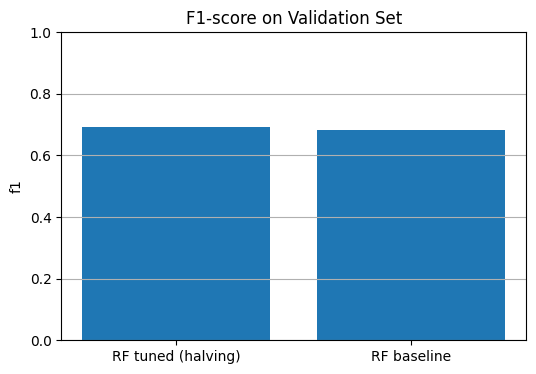

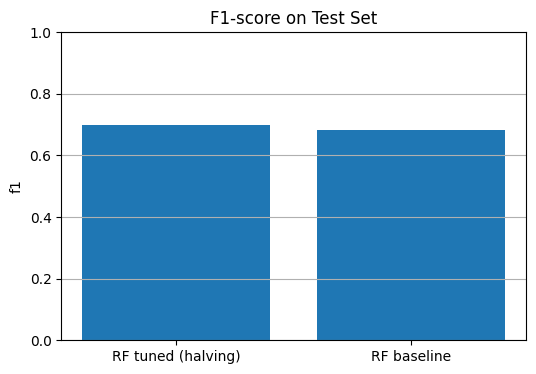

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_metric(df, metric, title):
    plt.figure(figsize=(6,4))
    plt.bar(df["model"], df[metric])
    plt.title(title)
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.grid(axis="y")
    plt.show()

plot_metric(comp_val, "f1", "F1-score on Validation Set")
plot_metric(comp_test, "f1", "F1-score on Test Set")


The confusion matrix from before illustrates the trade-off between false positives and false negatives

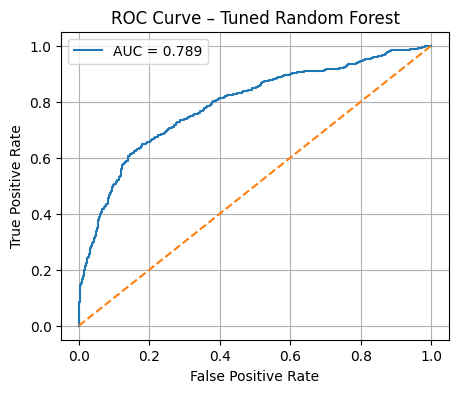

In [33]:
from sklearn.metrics import roc_curve, auc

y_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Tuned Random Forest")
plt.legend()
plt.grid(True)
plt.show()


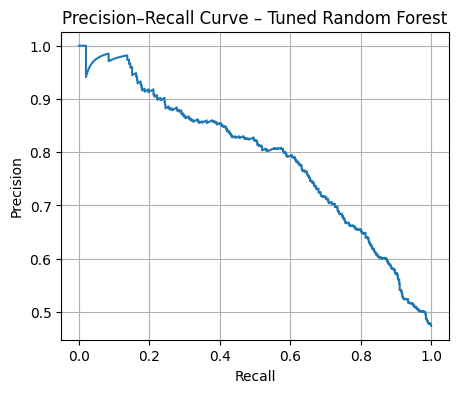

In [34]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(5,4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Tuned Random Forest")
plt.grid(True)
plt.show()


9. **Model Interpretability**  
   - Use techniques like **SHAP** or **LIME** to explain how models make predictions.
   - Visualize which features are most influential in your model’s decisions.

In [35]:
!pip install shap


In [36]:
import shap
import numpy as np
import matplotlib.pyplot as plt


In [39]:
# transform
X_val_proc = preprocessor.transform(X_val)

# אם זה sparse matrix – נהפוך ל-dense
if hasattr(X_val_proc, "toarray"):
    X_val_proc = X_val_proc.toarray()

# נוודא טיפוס float
X_val_proc = X_val_proc.astype(float)


In [40]:
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_val_proc)


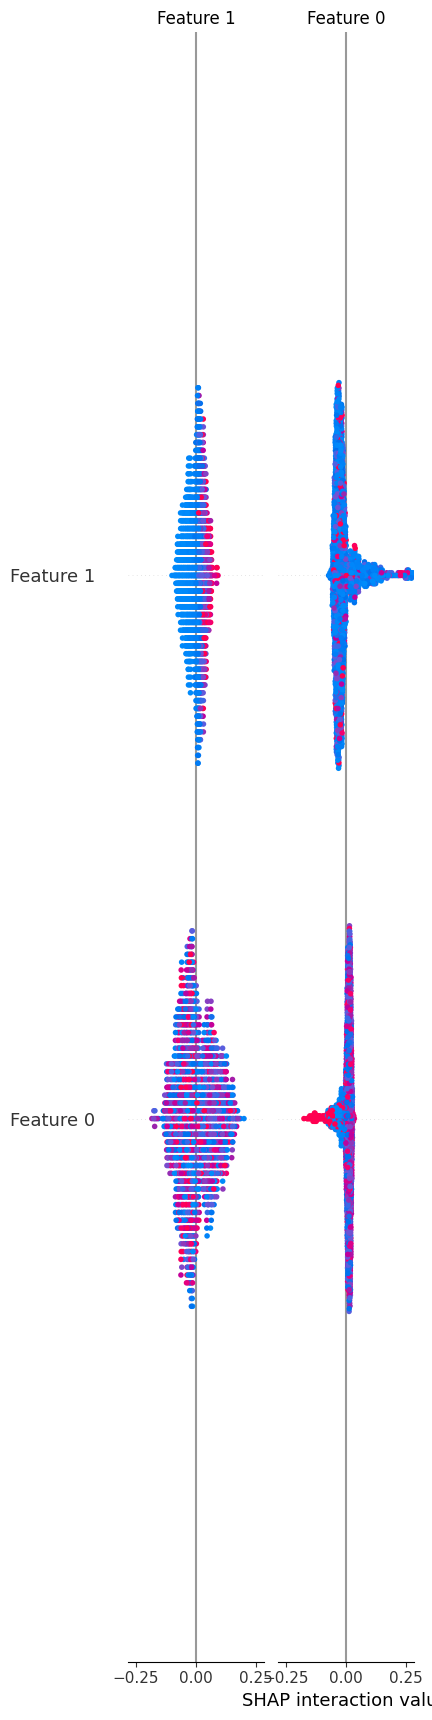

In [42]:
import shap
import numpy as np

X_val_proc = preprocessor.transform(X_val)
if hasattr(X_val_proc, "toarray"):
    X_val_proc = X_val_proc.toarray()
X_val_proc = X_val_proc.astype(np.float32)

explainer = shap.TreeExplainer(rf_clf)

exp = explainer(X_val_proc)

shap.summary_plot(exp, X_val_proc, max_display=20)


10. **Summary and Recommendations**  
   - Summarize your findings:
     - Which model performed best?
     - What hyperparameters were most influential?
     - What feature engineering/selection techniques were effective?
   - Address potential **concept drift** or how the model could be maintained over time.

11. **Presentation** (ask your instructor if you should do it)
   - Prepare a presentation of your results, including important findings, experiments, and visualizations.
   - Be prepared to explain your decisions and reasoning behind each choice.